In [25]:
import os
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

print('Библиотеки загружены')

Библиотеки загружены


In [2]:
reg_data = pd.read_csv('audi.csv')
class_data = pd.read_csv('weatherAUS.csv')

# Regression

In [3]:
reg_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
reg_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


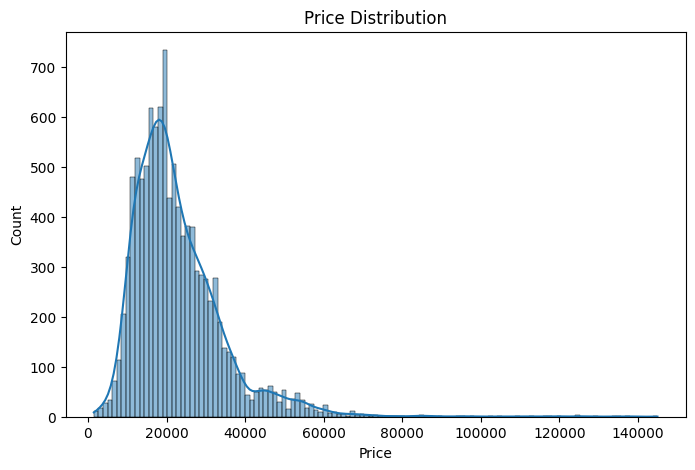

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(reg_data['price'], bins='auto', kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [7]:
reg_data = reg_data[reg_data['price'] < 75000]

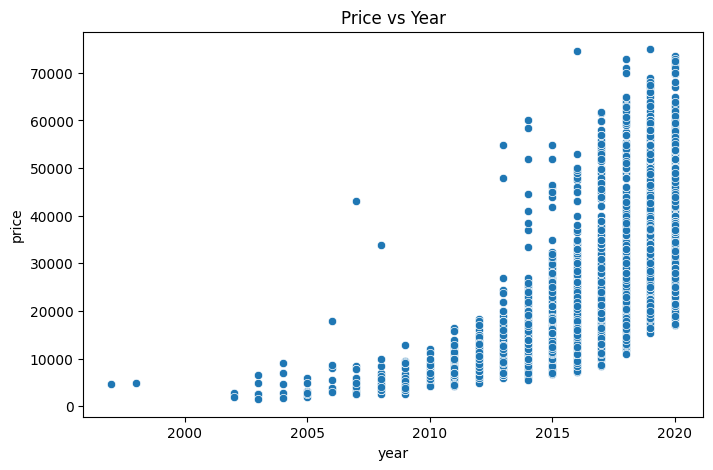

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=reg_data, x='year', y='price')
plt.title('Price vs Year')
plt.show()

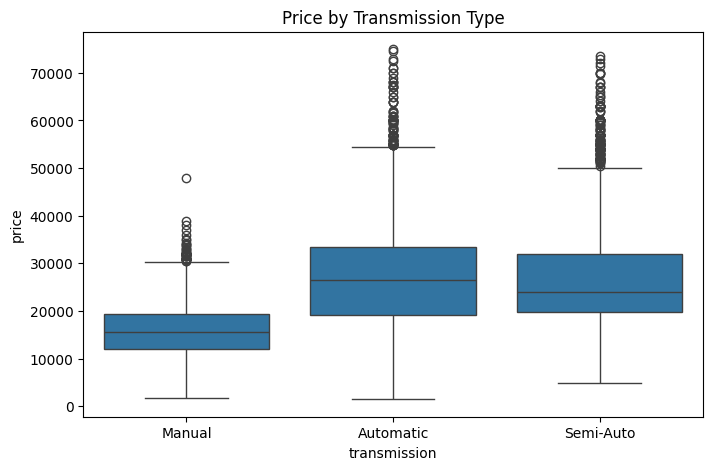

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=reg_data, x='transmission', y='price')
plt.title('Price by Transmission Type')
plt.show()

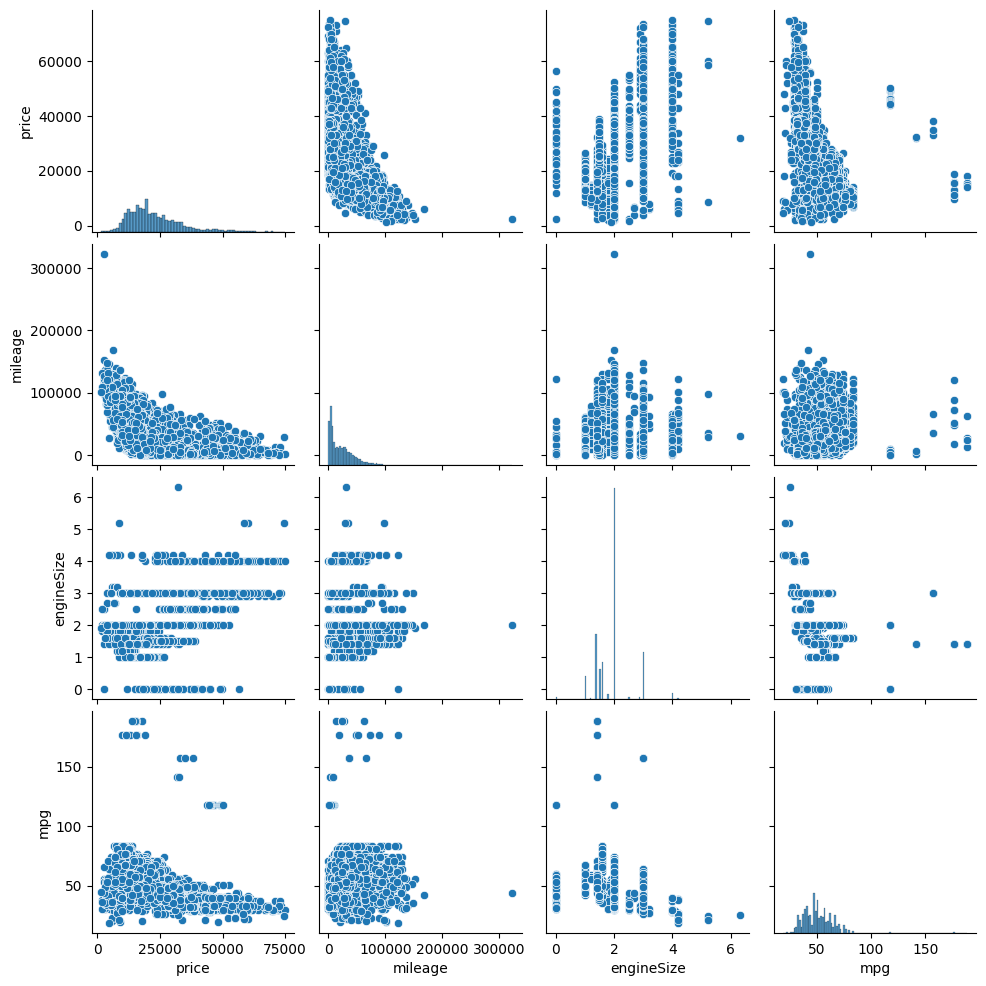

In [10]:
sns.pairplot(reg_data[['price', 'mileage', 'engineSize', 'mpg']])
plt.show()

In [11]:
str_cols = ['model', 'transmission', 'fuelType']
num_cols = ['year', 'mileage', 'engineSize', 'mpg', 'tax']
target_col = 'price'

In [12]:
te = TargetEncoder()
scaler = StandardScaler()

In [13]:
X = reg_data.drop('price', axis=1)
y = reg_data['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, tree_method='hist', verbosity=0, eval_metric='rmse')

In [16]:
transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, num_cols),
    ('cat', te, str_cols)
])


full_pipe = Pipeline([('preprocessing', transformer), ('model', model)])


full_pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
y_pred = full_pipe.predict(X_test)

In [18]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

RMSE: 2173.7007613744813
MAE: 1545.9388427734375
R2: 0.9578989744186401
MSE: 4724975.0


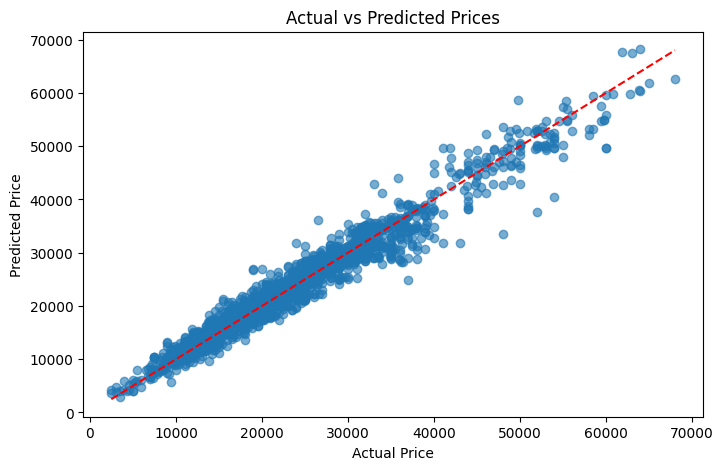

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [20]:
param_dist = {
    'model__n_estimators': [200, 300, 400, 600],
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'model__subsample': [0.7, 0.85, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 1.0],
    'model__min_child_weight': [1, 3, 5]
}

rs = RandomizedSearchCV(
    full_pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [21]:
rs.fit(X_train, y_train)
print('Best params:', rs.best_params_)
print('Best CV score (neg RMSE):', rs.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__min_child_weight': 5, 'model__max_depth': 6, 'model__learning_rate': 0.03, 'model__gamma': 0.1, 'model__colsample_bytree': 0.6}
Best CV score (neg RMSE): -2235.938134765625


In [22]:
# Оценка на тестовой выборке
best_pipe = rs.best_estimator_
y_pred_rs = best_pipe.predict(X_test)
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rs)))
print('Test MAE:', mean_absolute_error(y_test, y_pred_rs))
print('Test R2:', r2_score(y_test, y_pred_rs))

Test RMSE: 2106.9441141140883
Test MAE: 1511.891845703125
Test R2: 0.9604452252388


In [26]:
class GradientBoostingRegressor:

    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = int(n_estimators)
        self.learning_rate = float(learning_rate)
        self.max_depth = int(max_depth)
        self.random_state = random_state
        self.trees_ = []
        self.base_prediction_ = 0.0

    def _to_numpy(self, X):
        if sp.issparse(X):
            return X.toarray()
        if hasattr(X, 'values'):
            return X.values
        return np.asarray(X)

    def fit(self, X, y):
        rng = check_random_state(self.random_state)
        X_arr = self._to_numpy(X)
        y_arr = np.asarray(y, dtype=float)

        self.trees_ = []
        self.base_prediction_ = y_arr.mean()
        residuals = y_arr - self.base_prediction_

        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=rng.randint(0, 10_000))
            tree.fit(X_arr, residuals)
            update = tree.predict(X_arr)
            residuals -= self.learning_rate * update
            self.trees_.append(tree)

        return self

    def predict(self, X):
        X_arr = self._to_numpy(X)
        y_pred = np.full(X_arr.shape[0], self.base_prediction_, dtype=float)
        for tree in self.trees_:
            y_pred += self.learning_rate * tree.predict(X_arr)
        return y_pred

In [27]:
transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, num_cols),
    ('cat', te, str_cols)
])

full_pipe_custom = Pipeline([
    ('preprocessing', transformer),
    ('model', GradientBoostingRegressor(n_estimators=120, learning_rate=0.1, max_depth=3, random_state=42))
])
full_pipe_custom.fit(X_train, y_train)
y_pred_custom = full_pipe_custom.predict(X_test)
print('Test RMSE custom (GBDT):', np.sqrt(mean_squared_error(y_test, y_pred_custom)))
print('Test MAE custom:', mean_absolute_error(y_test, y_pred_custom))
print('Test R2 custom:', r2_score(y_test, y_pred_custom))

Test RMSE custom (GBDT): 2485.906077102406
Test MAE custom: 1797.0797636195878
Test R2 custom: 0.944936692060078


## Добавим пару новых фич

### Датасет был обновлён в 2020 году, поэтому возраст считается относительно 2021, чтобы не было деления на ноль

In [28]:
X['age'] = 2021 - X['year']

In [29]:
X['MileagePerYear'] = X['mileage'] / X['age']

In [30]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,age,MileagePerYear
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,4,3933.75
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,5,7240.60
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,5,5989.20
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,4,6488.00
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,2,999.00


In [31]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
str_cols = X.select_dtypes(include=['object']).columns.tolist()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, num_cols),
    ('cat', te, str_cols)
])

model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, tree_method='hist', verbosity=0, eval_metric='rmse')


full_pipe = Pipeline([('preprocessing', transformer), ('model', model)])

In [34]:
param_dist = {
    'model__n_estimators': [200, 300, 400, 600],
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'model__subsample': [0.7, 0.85, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 1.0],
    'model__min_child_weight': [1, 3, 5]
}

rs = RandomizedSearchCV(
    full_pipe,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [35]:
rs.fit(X_train, y_train)
print('Best params:', rs.best_params_)
print('Best CV score (neg RMSE):', rs.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__min_child_weight': 5, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 1.0, 'model__colsample_bytree': 0.6}
Best CV score (neg RMSE): -2246.245947265625


In [36]:
# Оценка на тестовой выборке
best_pipe = rs.best_estimator_
y_pred_rs = best_pipe.predict(X_test)
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rs)))
print('Test MAE:', mean_absolute_error(y_test, y_pred_rs))
print('Test R2:', r2_score(y_test, y_pred_rs))

Test RMSE: 2150.140576799573
Test MAE: 1520.1363525390625
Test R2: 0.9588066935539246


# Classification

In [37]:
class_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [38]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [39]:
class_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [40]:
class_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


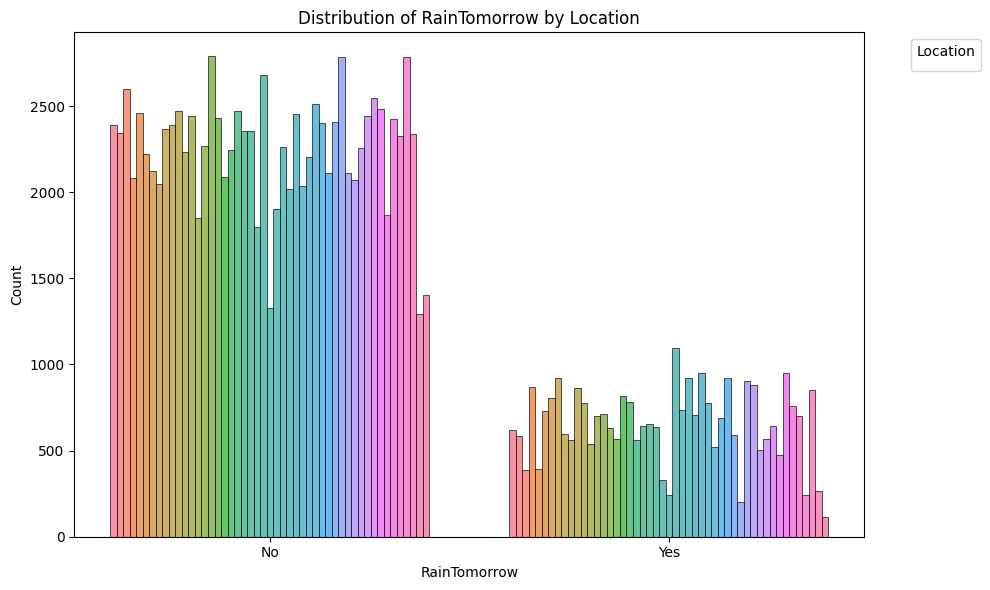

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data=class_data, x='RainTomorrow', hue='Location', multiple='dodge', shrink=0.8)
plt.title('Distribution of RainTomorrow by Location')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

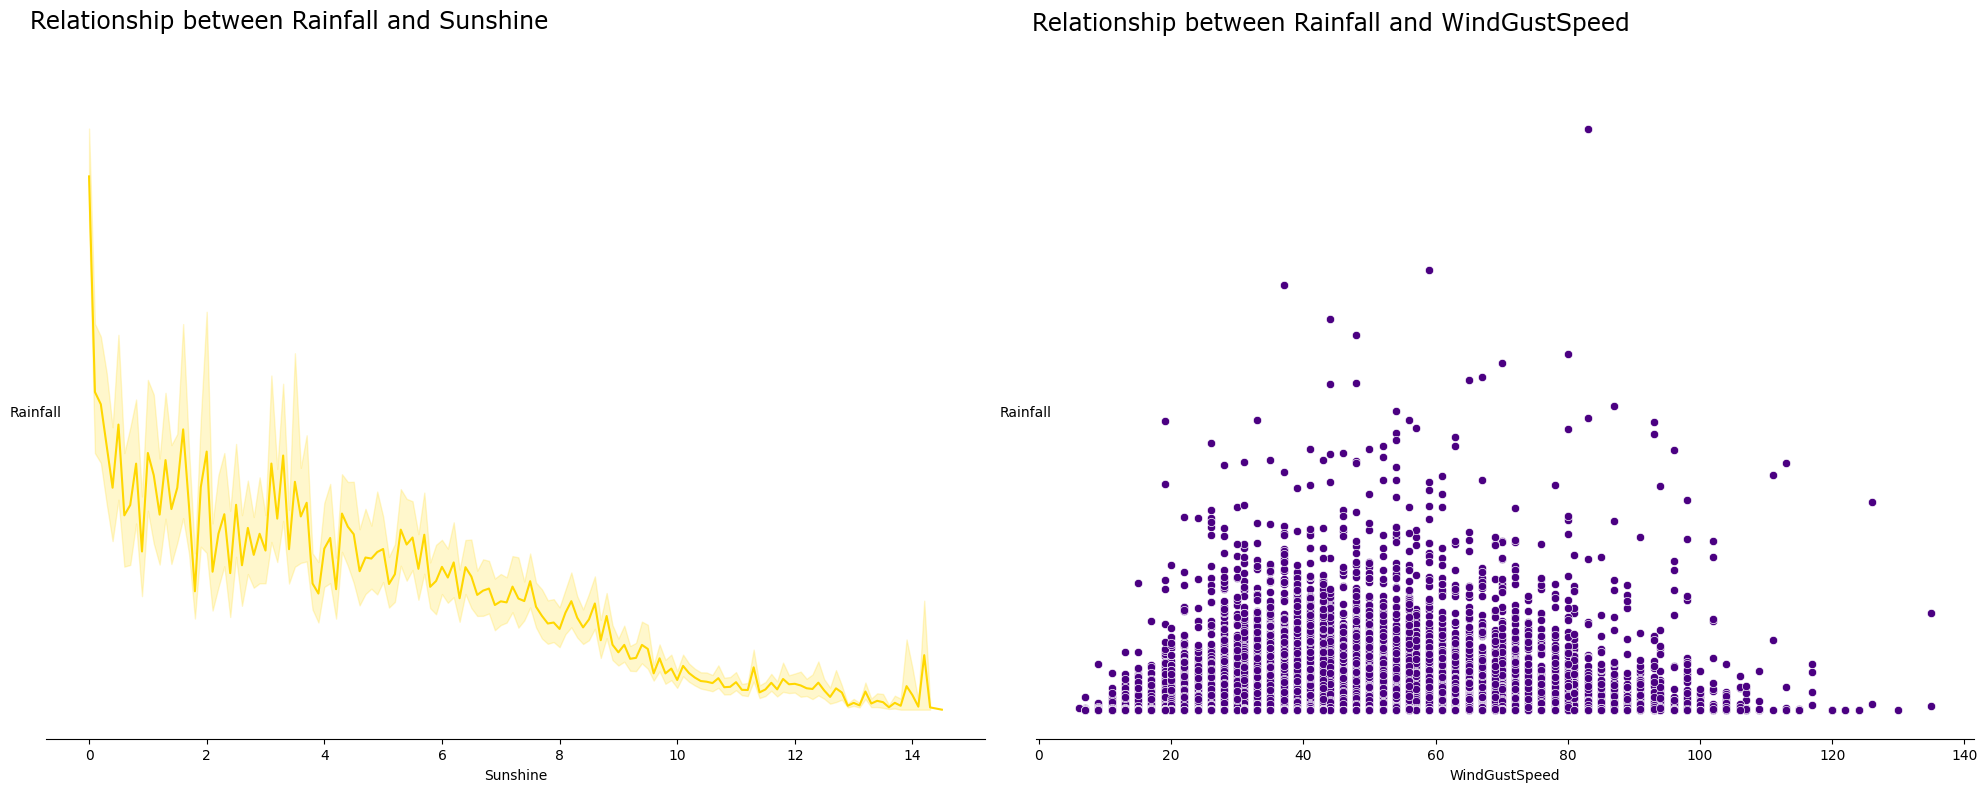

In [42]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Rainfall and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and WindGustSpeed",fontsize=17,fontweight='normal', fontfamily='Verdana')

sns.lineplot(data=class_data,x='Sunshine',y='Rainfall',ax=ax[0],color='#FFD700')
sns.scatterplot(data=class_data,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='#4B0082')

for i in range(2):
    
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

<Axes: xlabel='Cloud3pm', ylabel='Rainfall'>

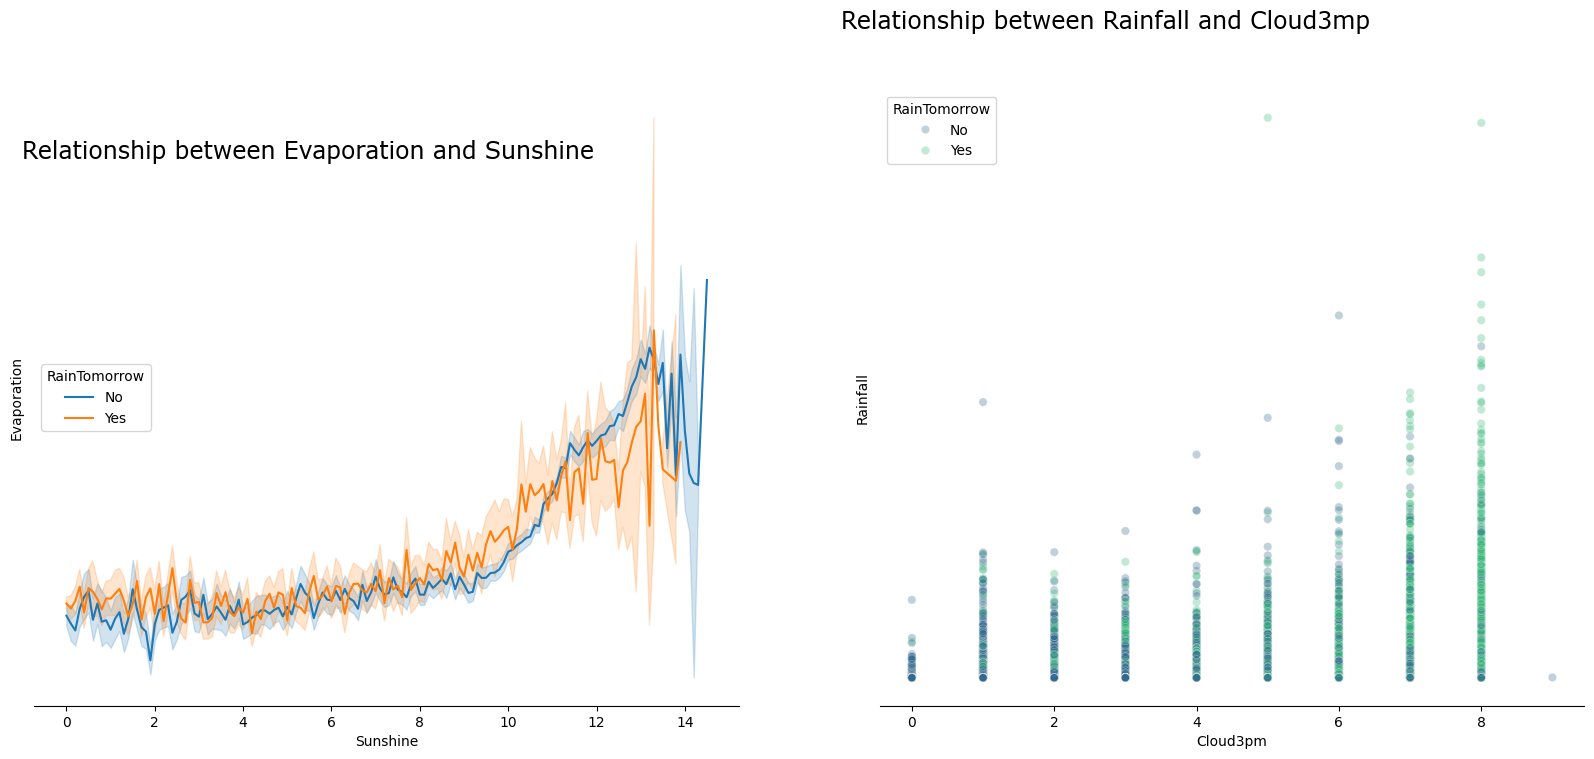

In [43]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Evaporation and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and Cloud3mp",fontsize=17,fontweight='normal', fontfamily='Verdana')


for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)

sns.lineplot(data=class_data,x='Sunshine',y='Evaporation',ax=ax[0],hue='RainTomorrow')
sns.scatterplot(data=class_data,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[1],palette='viridis',markers='o',alpha=0.3)

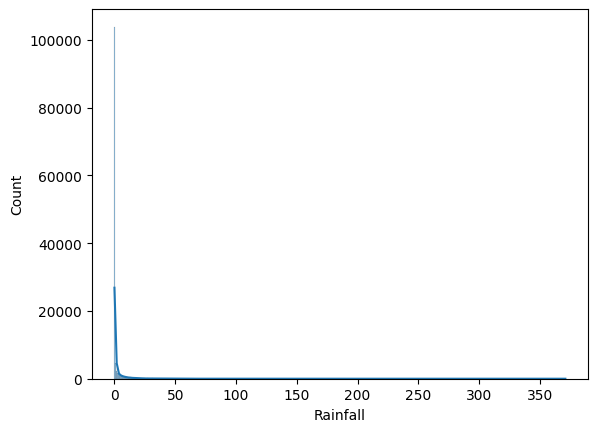

In [44]:
sns.histplot(data = class_data, x = 'Rainfall', bins = 'auto', kde = True);

<Axes: xlabel='MaxTemp', ylabel='Count'>

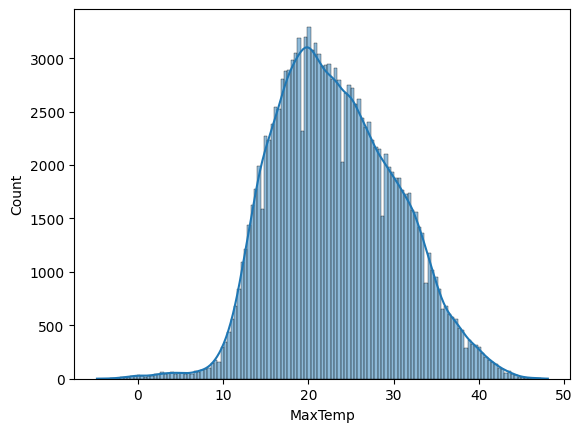

In [45]:
sns.histplot(data = class_data, x = 'MaxTemp', bins = 'auto', kde = True)

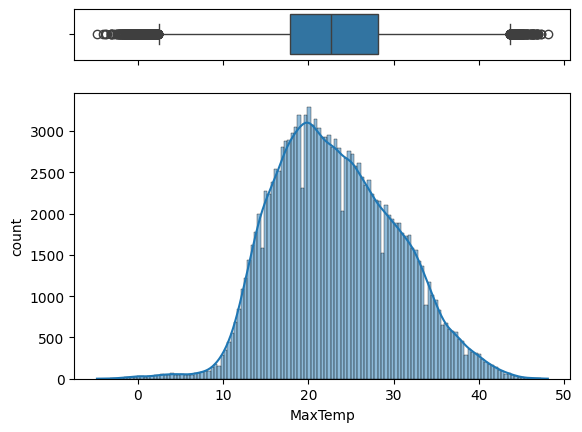

In [46]:
fig, (ax_box, ax_hist) = plt.subplots(2, 
                                    sharex = True, 
                                    gridspec_kw = {'height_ratios': (.15, .85)}) 
 
sns.boxplot(x = class_data['MaxTemp'], ax = ax_box)
sns.histplot(x = class_data['MaxTemp'], ax = ax_hist, bins = 'auto', kde = True)
 
ax_box.set(xlabel = '') 
ax_hist.set(xlabel = 'MaxTemp')
ax_hist.set(ylabel = 'count')
 
plt.show()

<Axes: xlabel='RainTomorrow', ylabel='count'>

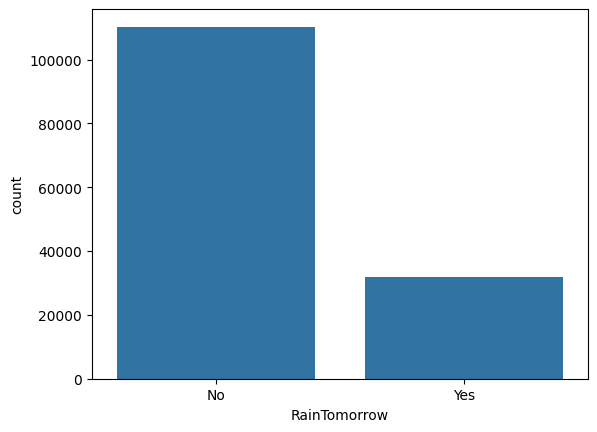

In [47]:
sns.countplot(x = 'RainTomorrow', data = class_data)

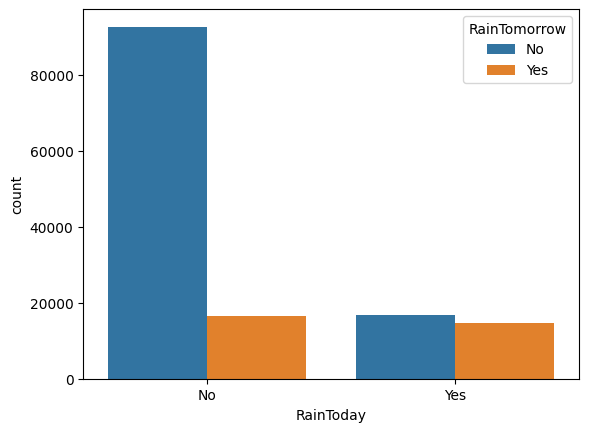

In [48]:
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = class_data);

In [49]:
str_cols = class_data.select_dtypes(include=['object']).columns.tolist()

print("Categorical variables:")
print(str_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [50]:
for i in str_cols:
    print(i, class_data[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [51]:
for i in str_cols:
    class_data[i].fillna(class_data[i].mode()[0], inplace=True)

In [52]:
class_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
class_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [53]:
class_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [54]:
num_cols = class_data.select_dtypes(include=[np.number]).columns.tolist()

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [55]:
for i in num_cols:
    print(i, class_data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 0
RainTomorrow 0


In [56]:
for i in num_cols:
    class_data[i].fillna(class_data[i].median(), inplace=True)

In [57]:
class_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [58]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [59]:
class_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [60]:
str_cols=class_data.select_dtypes(include='object').columns.to_list()
print(str_cols)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [61]:
class_data.drop(columns='Date', inplace=True)

In [62]:
str_cols=class_data.select_dtypes(include='object').columns.to_list()
print(str_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


<Axes: >

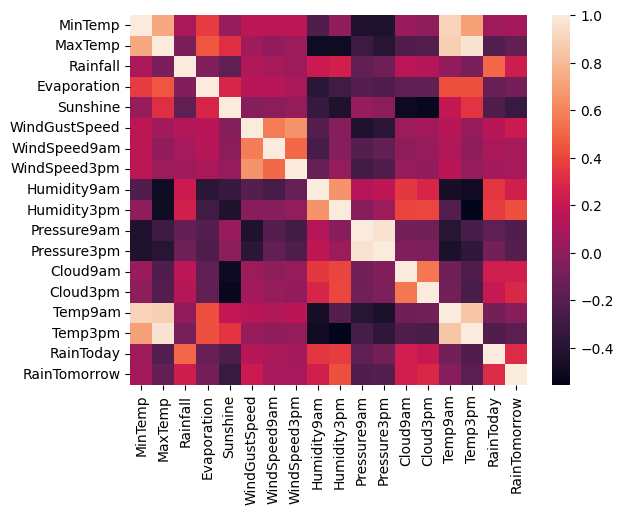

In [63]:
sns.heatmap(class_data.select_dtypes(include=[np.number]).corr())

In [64]:
scaler = StandardScaler()
te = TargetEncoder()

In [65]:
X, y = class_data.drop('RainTomorrow', axis=1), class_data['RainTomorrow']

In [66]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
str_cols = X.select_dtypes(include=['object']).columns.tolist()

In [67]:
transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, num_cols),
    ('cat', te, str_cols)
])

xgb_clf = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    tree_method='hist',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline([('preprocessing', transformer), ('model', xgb_clf)])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
y_pred = pipe.predict(X_test)

Accuracy: 0.8545992025299052
F1 (binary): 0.6102100995208256
F1 (macro): 0.7604206924545732

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22672
           1       0.75      0.52      0.61      6420

    accuracy                           0.85     29092
   macro avg       0.81      0.73      0.76     29092
weighted avg       0.85      0.85      0.84     29092


Confusion matrix:
 [[21551  1121]
 [ 3109  3311]]

Class distribution (test):
RainTomorrow
0    22672
1     6420
Name: count, dtype: int64
Baseline (most frequent) accuracy: 0.7793207754709198

ROC AUC: 0.8831961404903079


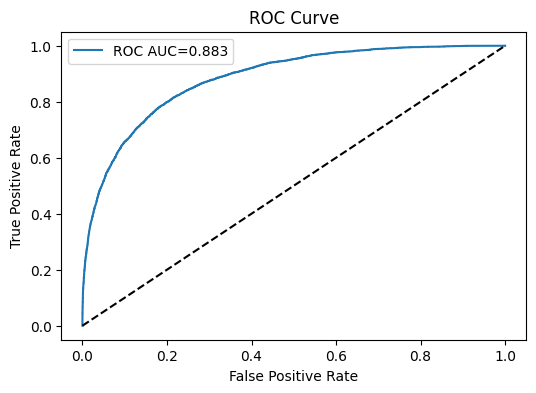

In [71]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 (binary):', f1_score(y_test, y_pred))
print('F1 (macro):', f1_score(y_test, y_pred, average='macro'))
print('\nClassification report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n', cm)

print('\nClass distribution (test):')
print(y_test.value_counts())
print('Baseline (most frequent) accuracy:', y_test.value_counts(normalize=True).max())

y_proba = pipe.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print('\nROC AUC:', auc)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC={auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [72]:
class GradientBoostingClassifier:

    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=2, random_state=None):
        self.n_estimators = int(n_estimators)
        self.learning_rate = float(learning_rate)
        self.max_depth = int(max_depth)
        self.random_state = random_state
        self.trees_ = []
        self.base_logit_ = 0.0
        self.threshold_ = 0.5

    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def _to_numpy(self, X):
        if sp.issparse(X):
            return X.toarray()
        if hasattr(X, 'values'):
            return X.values
        return np.asarray(X)

    def fit(self, X, y):
        rng = check_random_state(self.random_state)
        X_arr = self._to_numpy(X)
        y_arr = np.asarray(y, dtype=int)

        pos_rate = np.clip(y_arr.mean(), 1e-4, 1 - 1e-4)
        self.base_logit_ = np.log(pos_rate / (1 - pos_rate))
        F = np.full(X_arr.shape[0], self.base_logit_, dtype=float)
        self.trees_ = []

        for _ in range(self.n_estimators):
            p = self._sigmoid(F)
            residual = y_arr - p
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=rng.randint(0, 10_000))
            tree.fit(X_arr, residual)
            update = tree.predict(X_arr)
            F += self.learning_rate * update
            self.trees_.append(tree)

        train_proba = self._sigmoid(F)
        thresholds = np.unique(np.concatenate(([0.0, 1.0], train_proba)))
        best_thr, best_score = 0.5, -np.inf
        for thr in thresholds:
            preds = (train_proba >= thr).astype(int)
            score = f1_score(y_arr, preds)
            if score > best_score:
                best_score = score
                best_thr = thr
        self.threshold_ = best_thr

        return self

    def _decision_function(self, X):
        X_arr = self._to_numpy(X)
        F = np.full(X_arr.shape[0], self.base_logit_, dtype=float)
        for tree in self.trees_:
            F += self.learning_rate * tree.predict(X_arr)
        return F

    def predict_proba(self, X):
        scores = self._decision_function(X)
        proba_pos = self._sigmoid(scores)
        return np.column_stack([1 - proba_pos, proba_pos])

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= self.threshold_).astype(int)

In [73]:
pipe_custom = Pipeline([
    ('preprocessing', transformer),
    ('model', GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=2, random_state=42))
])
pipe_custom.fit(X_train, y_train)
y_pred_custom = pipe_custom.predict(X_test)

Оптимальный порог (train): 0.27274428429748565
Accuracy (pipe_custom): 0.8147600714973189
F1 (binary): 0.6094644539459381
F1 (macro): 0.7440247807636641

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     22672
           1       0.57      0.65      0.61      6420

    accuracy                           0.81     29092
   macro avg       0.73      0.76      0.74     29092
weighted avg       0.83      0.81      0.82     29092


Confusion matrix:
 [[19498  3174]
 [ 2215  4205]]


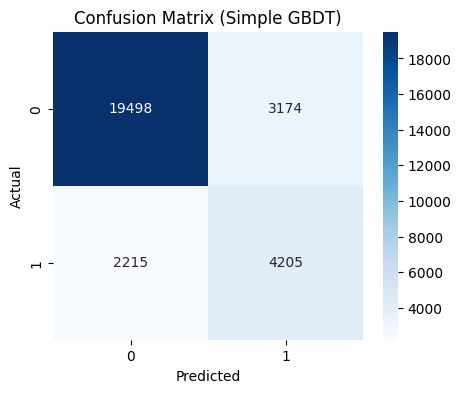


Class distribution (test):
RainTomorrow
0    22672
1     6420
Name: count, dtype: int64
Baseline (most frequent) accuracy: 0.7793207754709198

ROC AUC: 0.8485661565063305


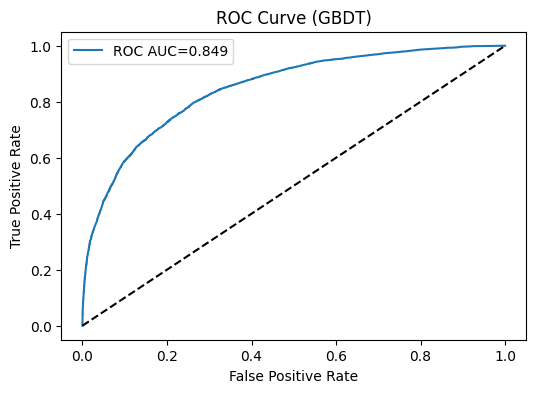

In [74]:
# Оценка качества pipe_custom (Simple GBDT)
print('Оптимальный порог (train):', pipe_custom.named_steps['model'].threshold_)
print('Accuracy (pipe_custom):', accuracy_score(y_test, y_pred_custom))
print('F1 (binary):', f1_score(y_test, y_pred_custom))
print('F1 (macro):', f1_score(y_test, y_pred_custom, average='macro'))
print('\nClassification report:\n', classification_report(y_test, y_pred_custom))

# Матрица неточностей и её визуализация
cm = confusion_matrix(y_test, y_pred_custom)
print('\nConfusion matrix:\n', cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Simple GBDT)')
plt.show()

print('\nClass distribution (test):')
print(y_test.value_counts())
print('Baseline (most frequent) accuracy:', y_test.value_counts(normalize=True).max())

y_proba = pipe_custom.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print('\nROC AUC:', auc)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC={auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (GBDT)')
plt.legend()
plt.show()




In [75]:
# Настроим RandomizedSearch для XGBoost (classification)
param_dist = {
    'model__n_estimators': [300, 500, 700],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'model__subsample': [0.7, 0.85, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.2, 1.0],
    'model__min_child_weight': [1, 3, 5],
    'model__reg_lambda': [1.0, 1.5, 2.0],
    'model__scale_pos_weight': [1.0, 1.5, 2.0]
}

rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [76]:
# Обучаем и выводим лучшие параметры и метрику по CV
rs.fit(X_train, y_train)
print('Best params:', rs.best_params_)
print('Best CV score (ROC AUC):', rs.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'model__subsample': 0.7, 'model__scale_pos_weight': 2.0, 'model__reg_lambda': 1.0, 'model__n_estimators': 700, 'model__min_child_weight': 1, 'model__max_depth': 4, 'model__learning_rate': 0.1, 'model__gamma': 1.0, 'model__colsample_bytree': 0.6}
Best CV score (ROC AUC): 0.8867186964725027


In [77]:
# Оценка на тестовой выборке
best_pipe = rs.best_estimator_
y_pred_rs = best_pipe.predict(X_test)

In [78]:
y_proba_rs = best_pipe.predict_proba(X_test)[:, 1]

Accuracy: 0.8450433108758422
F1 (binary): 0.6604398915335945
F1 (macro): 0.780028443139203

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     22672
           1       0.64      0.68      0.66      6420

    accuracy                           0.85     29092
   macro avg       0.77      0.79      0.78     29092
weighted avg       0.85      0.85      0.85     29092


Confusion matrix:
 [[20200  2472]
 [ 2036  4384]]


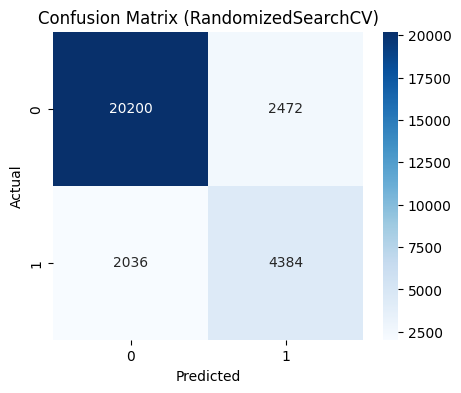


ROC AUC: 0.8884519647108872


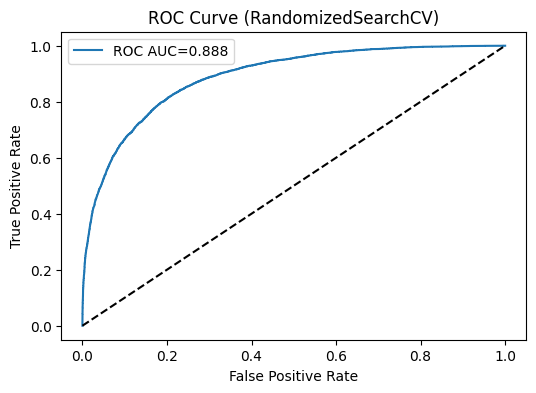

In [79]:
print('Accuracy:', accuracy_score(y_test, y_pred_rs))
print('F1 (binary):', f1_score(y_test, y_pred_rs))
print('F1 (macro):', f1_score(y_test, y_pred_rs, average='macro'))
print('\nClassification report:\n', classification_report(y_test, y_pred_rs))

cm = confusion_matrix(y_test, y_pred_rs)
print('\nConfusion matrix:\n', cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RandomizedSearchCV)')
plt.show()

auc = roc_auc_score(y_test, y_proba_rs)
print('\nROC AUC:', auc)
fpr, tpr, _ = roc_curve(y_test, y_proba_rs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC={auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RandomizedSearchCV)')
plt.legend()
plt.show()